## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Path
path = r"C:\Users\Natalia\Documents\World University Rank"

In [4]:
# Import the times data

df = pd.read_csv(os.path.join(path, '02 Original Data', 'timesData.csv'))

In [5]:
df.shape

(1999, 14)

In [6]:
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,0,2011
1,1,California Institute of Technology,United States of America,95.7,56.0,98.2,99.9,97.0,94.8,"2,243",6.9,27%,33 : 67,2012
2,1,California Institute of Technology,United States of America,96.3,59.8,99.4,99.7,95.6,95.5,"2,243",6.9,27%,33 : 67,2013
3,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
4,1,California Institute of Technology,United States of America,92.2,67.0,98.1,99.7,89.1,94.3,"2,243",6.9,27%,33 : 67,2015


In [7]:
# Rename the columns in the same way as in Exercise 6.2.

df.rename(columns = {'world_rank' : 'World rank', 'university_name' : 'University name', 'teaching' : 'Teaching', 'total_score' : 'Total score', 'num_students' : 'No Students', 'student_staff_ratio' : 'Student Staff ratio', 'international_students' : 'International Students', 'female_male_ratio' : 'Female/Male ratio'}, inplace = True)

In [8]:
# As we can see, there is plenty of categorical data, so we need to keep only the numerical one
df = df.drop(columns =['University name','country','International Students','Female/Male ratio', 'No Students'])

In [9]:
df

,World rank,Teaching,international,research,citations,income,Total score,Student Staff ratio,year
0,1,99.7,72.4,98.7,98.8,34.5,96.1,8.9,2011
1,1,95.7,56.0,98.2,99.9,97.0,94.8,6.9,2012
2,1,96.3,59.8,99.4,99.7,95.6,95.5,6.9,2013
3,1,94.4,65.8,98.2,99.8,91.2,94.9,6.9,2014
4,1,92.2,67.0,98.1,99.7,89.1,94.3,6.9,2015
...,...,...,...,...,...,...,...,...,...
1196,200,32.9,56.2,30.4,54.4,76.8,41.4,12.0,2012
1197,200,27.6,83.2,30.5,72.8,29.4,46.2,17.2,2013
1198,200,19.7,63.0,13.1,99.2,53.7,45.6,13.7,2015
1199,200,44.6,39.9,25.1,70.0,29.3,45.6,12.0,2015


### 2. The elbow technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
# Create a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[-6871413.660316403,
 -3319594.082298077,
 -2556491.9326168424,
 -2241693.8305939334,
 -2012325.9716453026,
 -1839715.6381446414,
 -1710592.7172245122,
 -1589978.6098963092,
 -1497790.3386809472]

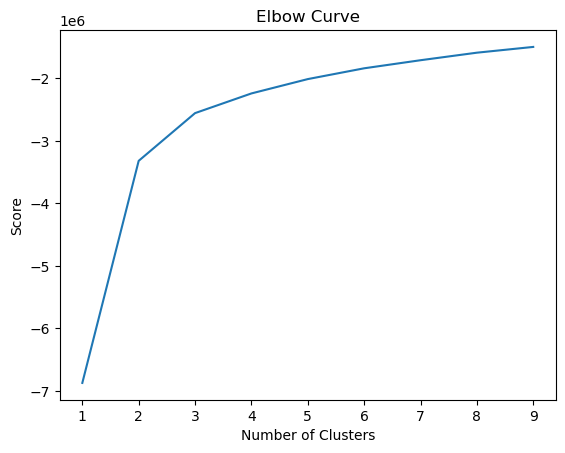

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Graph shows a significant increase from two to three on the x-axis and it keeps increasing gradually. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [13]:
# First, create the object based on the n° of clusters
kmeans = KMeans(n_clusters = 3) 

In [14]:
# Then fit the K-mean into the DF
kmeans.fit(df)

KMeans(n_clusters=3)

In [15]:
df['clusters'] = kmeans.fit_predict(df)

In [16]:
df.head()

,World rank,Teaching,international,research,citations,income,Total score,Student Staff ratio,year,clusters
0,1,99.7,72.4,98.7,98.8,34.5,96.1,8.9,2011,1
1,1,95.7,56.0,98.2,99.9,97.0,94.8,6.9,2012,1
2,1,96.3,59.8,99.4,99.7,95.6,95.5,6.9,2013,1
3,1,94.4,65.8,98.2,99.8,91.2,94.9,6.9,2014,1
4,1,92.2,67.0,98.1,99.7,89.1,94.3,6.9,2015,1


In [17]:
# Verify if the clusters we correctly assigned with a general view
df['clusters'].value_counts()

0    426
2    423
1    352
Name: clusters, dtype: int64

### Create different visualizations (e.g., scatterplots) using clustered data.

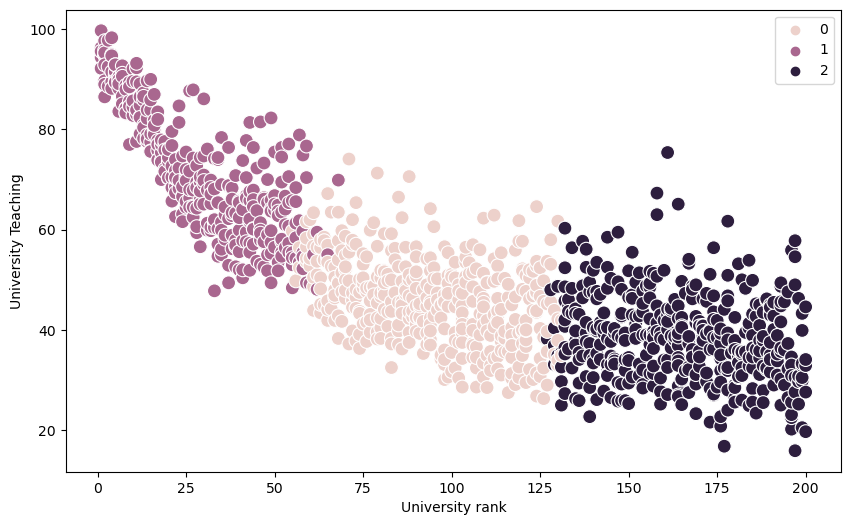

In [18]:
# And now plot it! World rank and Teaching compared

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['World rank'], y=df['Teaching'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('University rank') # Label x-axis.
plt.ylabel('University Teaching') # Label y-axis.
plt.show()

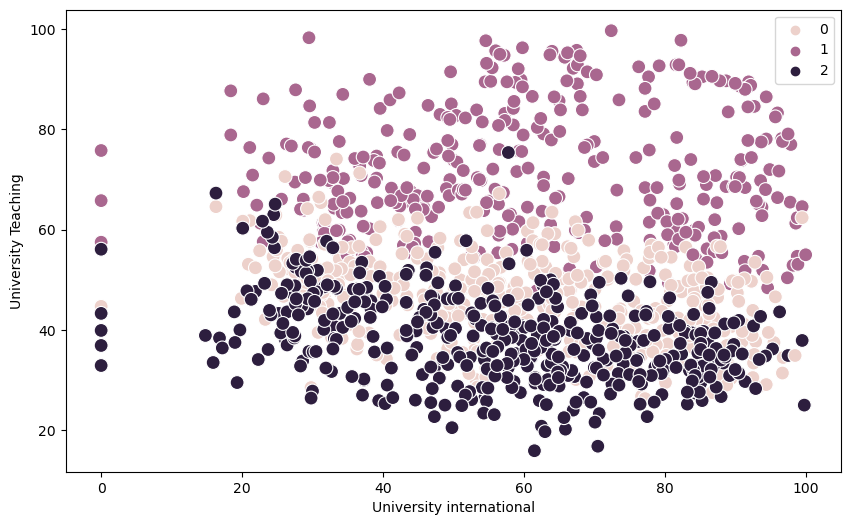

In [19]:
# Then, the International and Teaching.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['international'], y=df['Teaching'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('University international') # Label x-axis.
plt.ylabel('University Teaching') # Label y-axis.
plt.show()

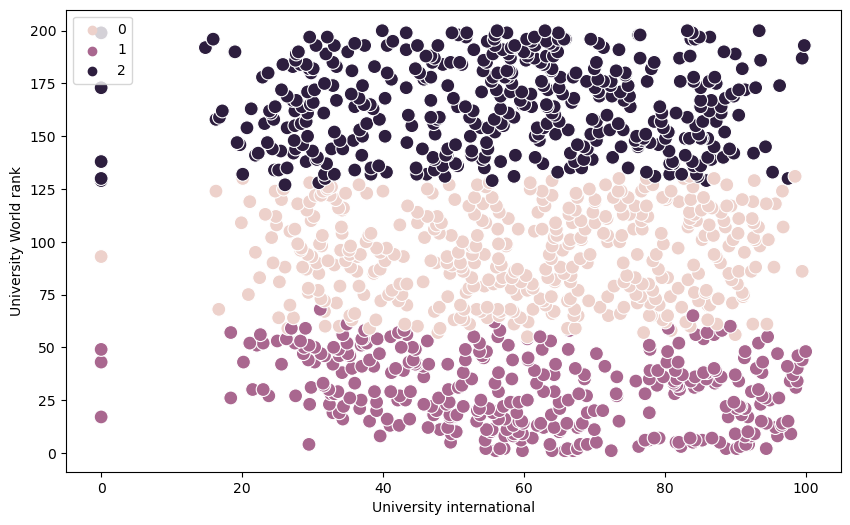

In [20]:
# Then, the International and World rank.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['international'], y=df['World rank'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('University international') # Label x-axis.
plt.ylabel('University World rank') # Label y-axis.
plt.show()

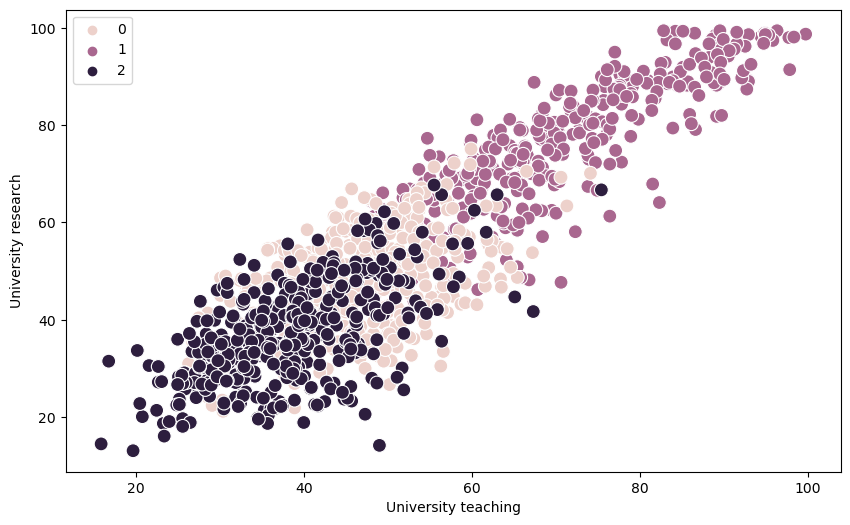

In [24]:
# Then, the Teaching and Research.
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['Teaching'], y=df['research'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('University teaching') # Label x-axis.
plt.ylabel('University research') # Label y-axis.
plt.show()

### Discuss how and why the clusters make sense.  
(If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.)

All the clusters made sense on their own.

**World rank and Teaching**: The second cluster (1) has higher teaching  and a lower world rank. While clusters 0 and 2 has a lower teaching and higher rank.

**International and Teaching**: Clusters are very diversified even though it has a few outliers


**International and World rank**: Each clusters shares the same range withing the scatterplot. It has more outliers than the scatterplot above.


### Calculate the descriptive statistics for your clusters using the groupby() function.

In [21]:
df.groupby('clusters').agg({'World rank':['mean', 'median'], 
                         'Teaching':['mean', 'median'],
                         'international':['mean', 'median'],
                         'research':['mean', 'median'],
                         'citations':['mean', 'median'],
                         'income':['mean', 'median'],
                         'Student Staff ratio':['mean', 'median'],
                         'year':['mean', 'median']})

World rank          Teaching        international          research  \
                mean median       mean median          mean median       mean   
clusters                                                                        
0          94.223005   94.0  46.000235   46.0     60.059624  61.25  47.326995   
1          29.829545   29.5  71.383523   69.8     60.879830  59.30  76.545455   
2         164.874704  164.0  38.308747   38.0     56.461702  57.80  36.996217   

                 citations            income        Student Staff ratio  \
         median       mean median       mean median                mean   
clusters                                                                  
0         47.65  77.013850  78.75  47.172535  40.45           16.319484   
1         76.35  86.676420  90.80  53.605114  52.50           12.409091   
2         36.00  68.731442  70.20  43.911348  39.50           17.758629   

                        year          
         median         mean  median  
clusters                              
0         15.20  2013.495305  2013.5  
1         11.55  2013.531250  2013.5  
2         15.80  2013.482270  2014.0